In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
X[-1].shape
X[-1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   8, 117, 254, 220,  89,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  13,  95, 212, 253, 253,
       253, 157,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  16,  95, 209, 253, 253,
       253, 245, 125,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  40,  96, 206, 253, 254,
       253, 253, 198,  64,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  44, 182, 240, 25

6


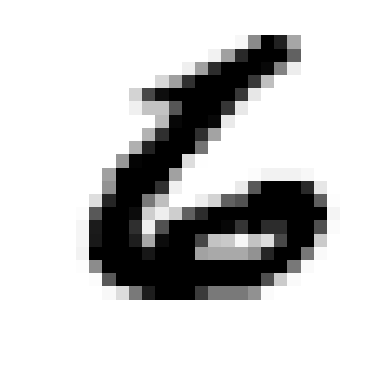

In [4]:
import matplotlib.pyplot as plt

def plot_digit(index):
    print(y[index])
    image = X[index].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

plot_digit(-1)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [5]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [7]:
for i in range(10):
    prediction = sgd_clf.predict([X_train[i]])
    print(prediction, y_train[i])

[False] 5
[False] 0
[False] 4
[False] 1
[False] 9
[False] 2
[False] 1
[False] 3
[False] 1
[False] 4


In [8]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ...,  True, False, False])

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53931,   648],
       [ 1231,  4190]], dtype=int64)

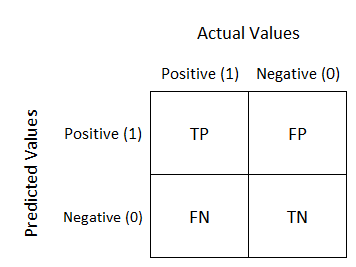

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.8660603555188094
0.7729201254381111
0.8168437469538942


In [11]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  -3.85853179, -365.68586757, -916.56040329, ...,  210.692012  ,
       -345.53884876, -316.84073964])

In [12]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

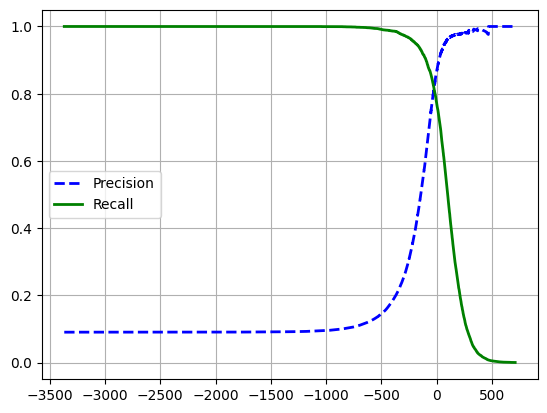

In [13]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.legend()
plt.show()

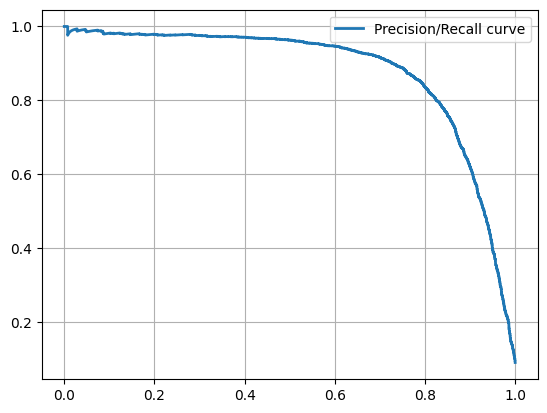

In [14]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.grid()
plt.legend()
plt.show()

In [15]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

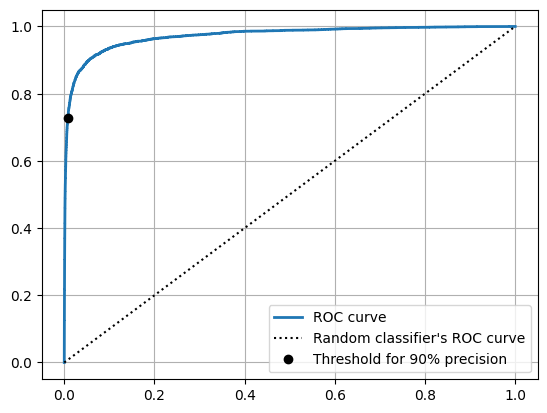

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.grid()
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9726681225154626

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
neigh.predict([X[0]])

array(['5'], dtype=object)

In [20]:
predictions = neigh.predict(X_train)

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, predictions)
plt.show()

SyntaxError: invalid syntax (1659910138.py, line 4)

In [22]:
y_scores = neigh.predict_proba(X_train)

In [23]:
from sklearn.preprocessing import label_binarize
import numpy as np

y_train_binarized = label_binarize(y_train, classes=np.unique(y))

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

n_classes = y_train_binarized.shape[1]
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_binarized[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_train_binarized[:, i], y_scores[:, i])

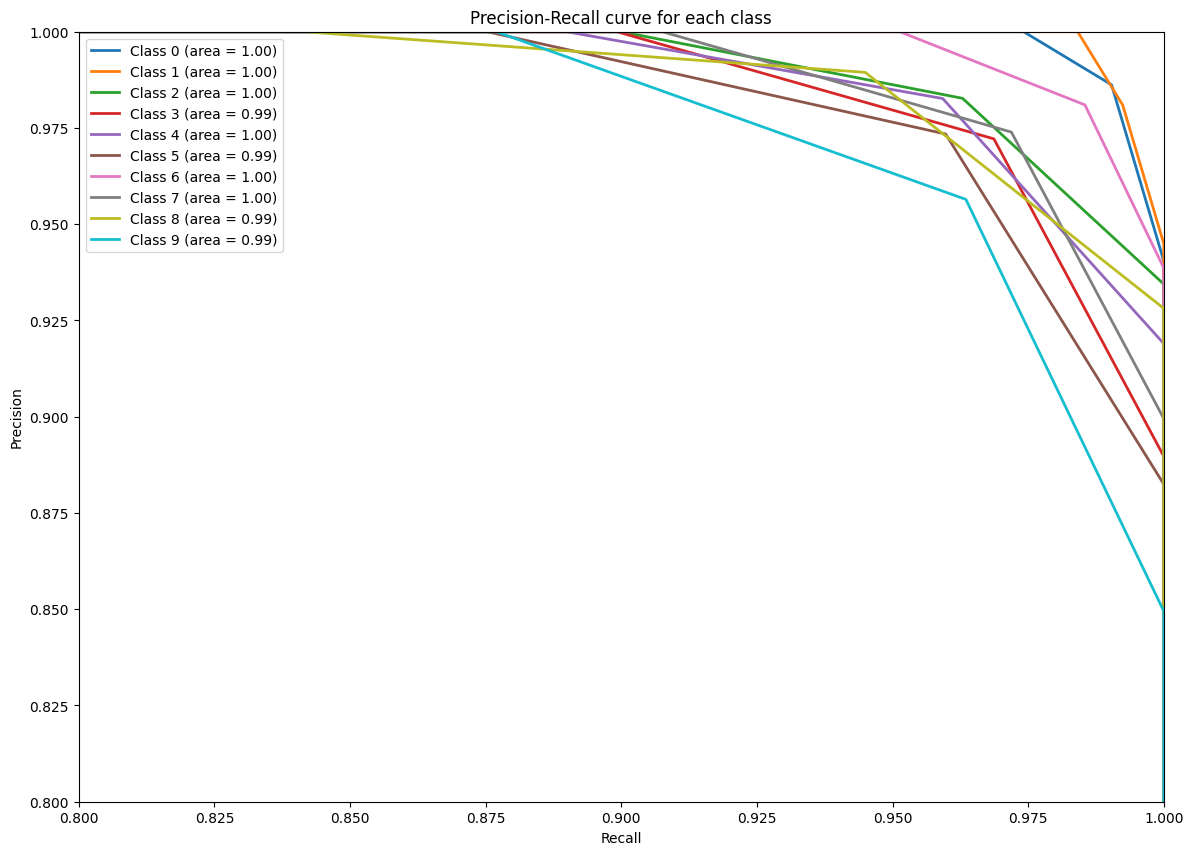

In [25]:
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve for each class")
plt.legend(loc="best")
plt.xlim([0.8, 1.0])
plt.ylim([0.8, 1.0])
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=neigh, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'n_neighbors': 5, 'weights': 'distance'}

In [27]:
grid_search.best_estimator_.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

predictions = grid_search.best_estimator_.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, predictions)

In [ ]:
test_predictions = grid_search.best_estimator_.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)

In [28]:
full_dataset_model = grid_search.best_estimator_.fit(X, y)

In [ ]:
final_predictions = full_dataset_model.predict(X)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, final_predictions)

In [29]:
import joblib

joblib.dump(full_dataset_model, 'number_recognition_model.pkl')

['number_recognition_model.pkl']